In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-white')

# Visualization with Matplotlib
    Histograms, Binnings, and Density
    Customizing Plot Legens
    Customizing ColorBars

## Histograms, Binnings, and Density

Histograms are very useful in starting to understand some data.

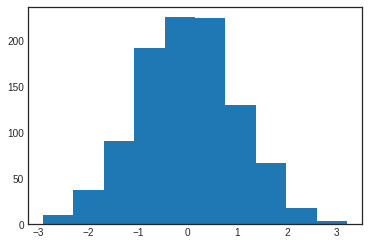

In [4]:
data = np.random.randn(1000)
plt.hist(data);

Just like we saw with plt.plot and plt.scatter **plt.hist()** has many options to tune and customize the plot.

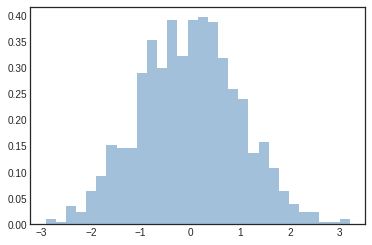

In [5]:
plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The combination of **histtype='stepfilled'** along with some transparency alpha can be very useful when comparing histograms of several distributions:

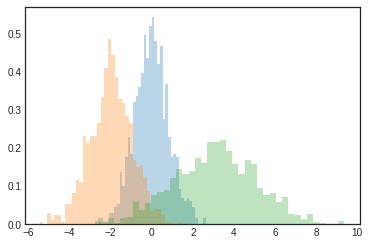

In [7]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

What if we want a histogram (count the number of points in a given bin), but not display it?

For that we can use **np.histogram()**.

In [8]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 47 283 451 197  22]


We can also create two-dimensional histograms by deviding points among 2d bins.

In [9]:
#define x and y by drawing from a multivariate Guassian distribution
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

The most straight forward wau to plot this is the **plt.hist2d()** function;

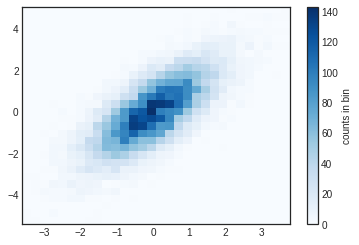

In [12]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [14]:
#of course there is a np equivalent for 2d histograms
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

The two-dimensional histogram creates a tesselation of squares across the axes. Another natural shape for such a tesselation is the regular hexagon. For this purpose, Matplotlib provides the plt.hexbin routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

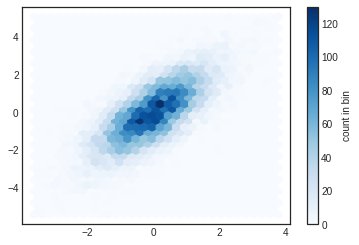

In [19]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

Another common method of evaluating densities in multiple dimensions is **kernel density estimation (KDE)**.

KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function.

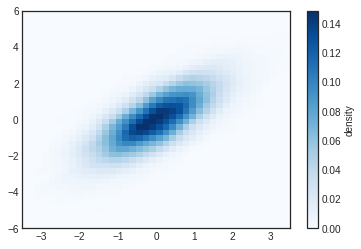

In [20]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off). 

**Moving on to Legends**

The simplest legend (as we've seen) is created with **plt.legend**.

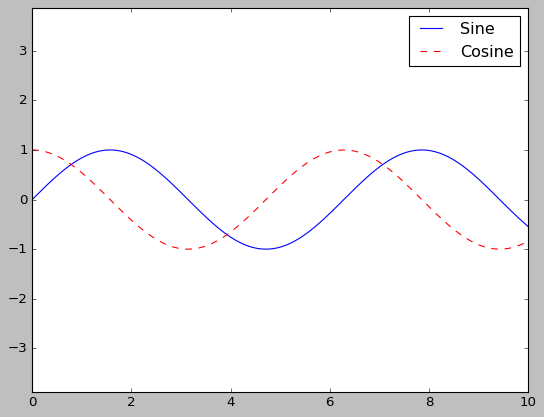

In [30]:
plt.style.use('classic')


x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

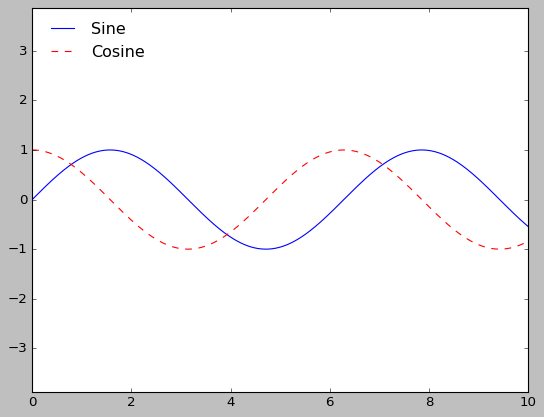

In [24]:
ax.legend(loc='upper left', frameon=False) #move to upper left corner and turn off the frame
fig

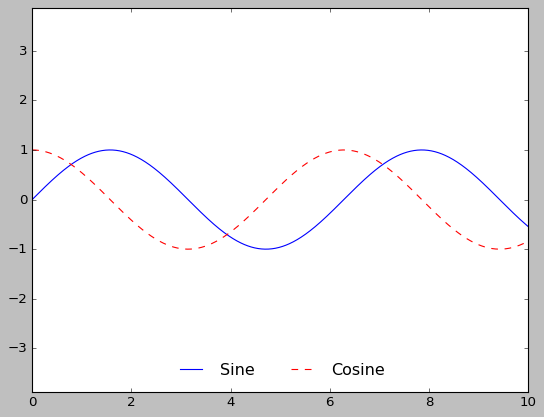

In [25]:
ax.legend(frameon=False, loc='lower center', ncol=2) #specify the number of columns to use in the legend
fig

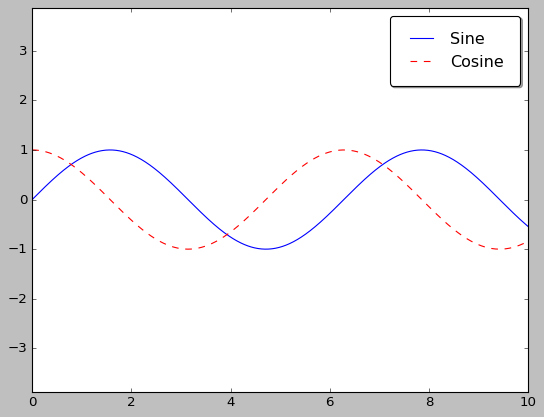

In [26]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
#you can make it look band by using a rounded box aka fancy box with a border
fig

The legend includes all labeled elements by default. If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.

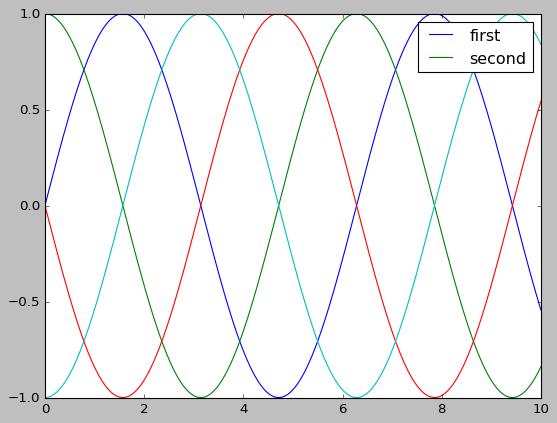

In [27]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

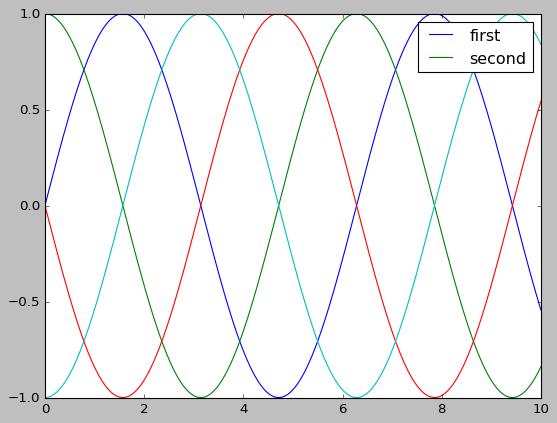

In [28]:
#this however is much cleaerer, only label the lines you want in the legend
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Below, the legend is used to show what the size of each point is representing. This is done by ploting empty lists with the desired sizes and labels, and then calling plt.legend.

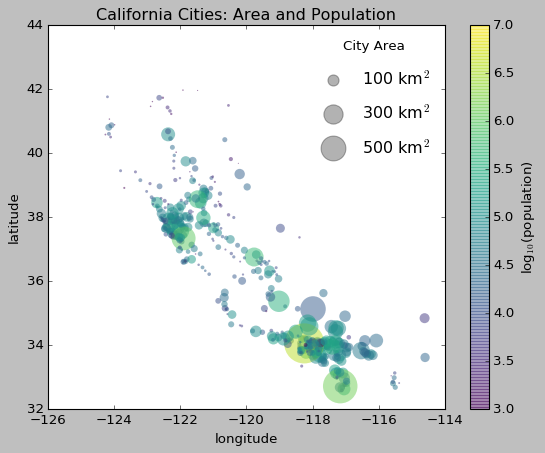

In [32]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it. In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists. 

Matplotlib will not allow you to have multiple legends on the same plot. We can work around this by creating a new legend artist from scratch, and then using the lower-level **ax.add_artist()** method to manually add the second artist to the plot:

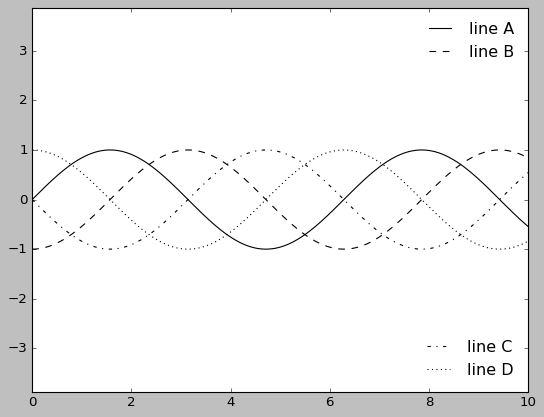

In [34]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg); #this wasn't as bad as I thought it would be

## Customizing Colorbars

Simplest colorbar is called just with **plt.colorbar()**, which we have already seen.

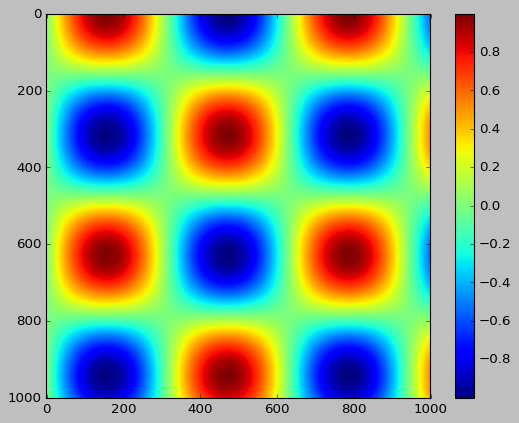

In [39]:
plt.style.use('classic')
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

Let's specify the colormap using the cmap argument to our plotting function.

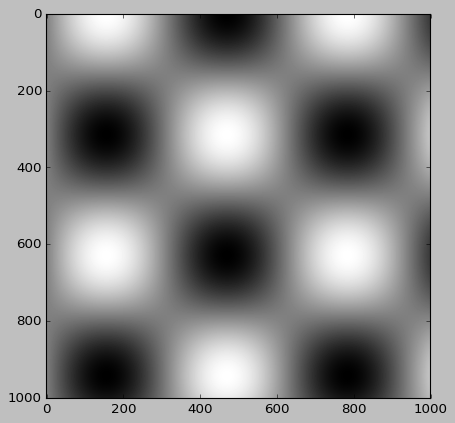

In [41]:
plt.imshow(I, cmap='gray');

Broadly, you should be aware of three different categories of colormaps:

+ **Sequential colormaps:** These are made up of one continuous sequence of colors (e.g., binary or viridis).


+ **Divergent colormaps:** These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).


+ **Qualitative colormaps:** these mix colors with no particular sequence (e.g., rainbow or jet).

Matplotlib allows for a large range of colorbar customization. The colorbar itself is simply an instance of plt.Axes, so all of the axes and tick formatting tricks we've learned are applicable.

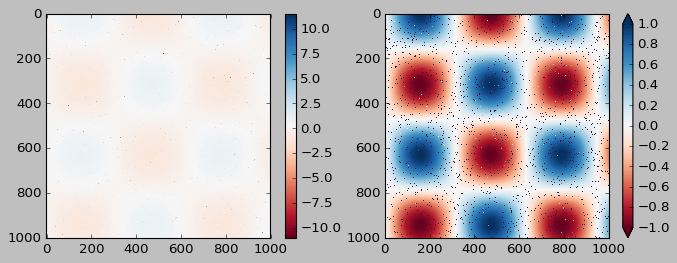

In [42]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in. In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits. 

Colormaps are generally continuous, but sometimes we want to represent discrete values.

The easiest way to do this is to use the **plt.cm.get_cmap()** function, and pass the name of a suitable colormap along with the number of desired bins:

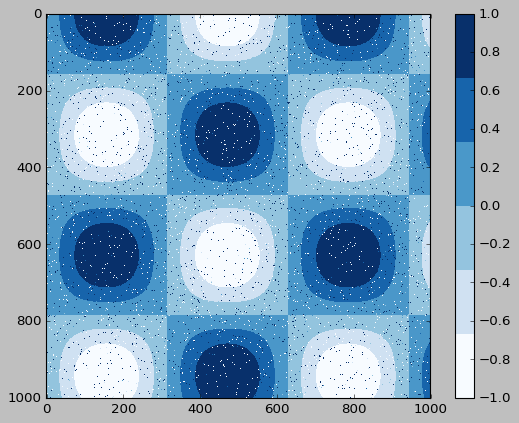

In [43]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6)) #six bins
plt.colorbar()
plt.clim(-1, 1);

### Example: Handwritten Digits

For an example of where this might be useful, let's look at an interesting visualization of some hand written digits data.

There 2,000 8x8 thumbnails showing various handwritten digits in the sklearn digit dataset.

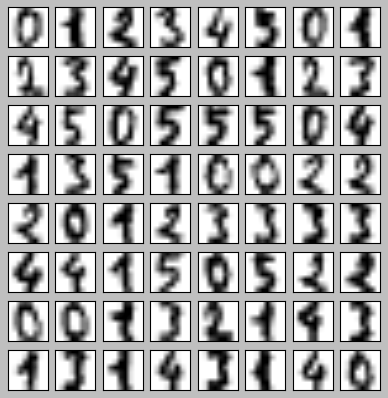

In [45]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel. But visualizing relationships in such high-dimensional spaces can be extremely difficult. 

One way to approach this is to use a dimensionality reduction technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest. 

In [46]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

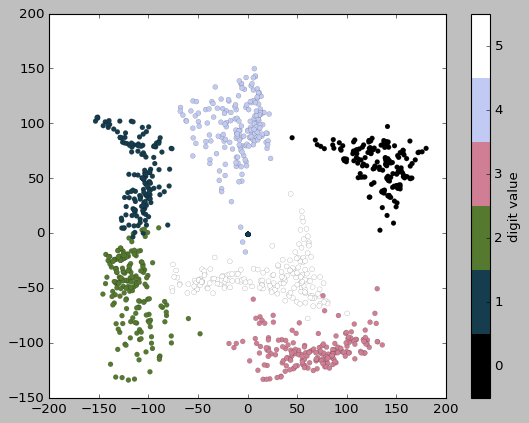

In [47]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

The ranges of 5 and 3 nearly overlap in this projection, indicating that some hand written fives and threes are difficult to distinguish, and therefore more likely to be confused by an automated classification algorithm. Other values, like 0 and 1, are more distantly separated, and therefore much less likely to be confused.